In [1]:
import matplotlib
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import sys
sys.path.append('../../_hepers_')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix
from genFillNulls import *
import warnings #to remove the warnings
warnings.filterwarnings('ignore')

NUBMER_OF_FOLDS = 50

In [2]:
'''WBC DATASET - 699 x 11'''

raw_wbc = pd.read_csv('breast-cancer-wisconsin.data', header=None)
wbc_cols = ['ID', 'Thickness', 'SizeUniformity', 'ShapeUniformity', 'Adhesion', 'Size', 'BareNuclei', 'Bland Chromatin', 'Nucleoli', 'Mitoses', 'Diagnosis']
raw_wbc.columns = wbc_cols
raw_wbc['Diagnosis'] = raw_wbc['Diagnosis'].map(
                   {2:0,4:1})
temp = []
for index, row in raw_wbc.iterrows():
    if '?' not in row.values:
        temp.append(row)
        
wbc_df = pd.DataFrame(np.array(temp), columns=wbc_cols)
for i in wbc_cols:
        wbc_df[i] = wbc_df[i].astype(np.int)
print(wbc_df.shape)
print(sum(wbc_df['Diagnosis']))

''' WBDC Dataset - 569 x 32'''

wdbc_cols = ['ID', 'Diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension',
        'radius_SE', 'texture_SE', 'perimeter_SE', 'area_SE', 'smoothness_SE', 'compactness_SE', 'concavity_SE', 'concave_points_SE', 'symmetry_SE', 'fractal_dimension_SE',
        'radius_MAX', 'texture_MAX', 'perimeter_MAX', 'area_MAX', 'smoothness_MAX', 'compactness_MAX', 'concavity_MAX', 'concave_points_MAX', 'symmetry_MAX', 'fractal_dimension_MAX']
wdbc_df = pd.read_csv('wdbc.data', header=None)

wdbc_df.columns = wdbc_cols
wdbc_df['Diagnosis'] = wdbc_df['Diagnosis'].map(
                   {'M':True,'B':False})


''' WBDC Dataset - 858 x 36'''

cervical_df = pd.read_csv('risk_factors_cervical_cancer.csv')

cervicalCols = ['Age', 'Number of sexual partners', 'First sexual intercourse',
                'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
                'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
                'IUD (years)', 'STDs (number)', 'STDs:condylomatosis',
                'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
                'STDs:syphilis', 'STDs:pelvic inflammatory disease',
                'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:HIV',
                'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
                'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
                'Dx:Cancer', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology',
                'Biopsy']

cervical_df = pd.read_csv('risk_factors_cervical_cancer.csv')
cervical_df = cervical_df[cervicalCols]
print(cervical_df.shape)
print('Num Positive Entries: {}'.format(sum(cervical_df['Biopsy'])))
cervicalAllNullsRemoved = removeEntriesWithNulls(cervical_df)
print(cervicalAllNullsRemoved.shape)

cervical_df = pd.read_csv('risk_factors_cervical_cancer.csv')
cervical_df = cervical_df[cervicalCols]
cervicalAllNullsSyntheticFilled = genSyntheticFillNulls(cervical_df)
print(cervicalAllNullsSyntheticFilled.shape)

for i in cervicalAllNullsSyntheticFilled:
        cervicalAllNullsSyntheticFilled[i] = cervicalAllNullsSyntheticFilled[i].astype(np.float)

surgicalDF = pd.read_csv('Surgical-deepnet.csv')
surgicalDF.rename(columns = {'complication':'Diagnosis'}, inplace = True)
for i in surgicalDF:
    surgicalDF[i] = surgicalDF[i].astype(np.float)

(683, 11)
239
(858, 32)
Num Positive Entries: 55
(59, 32)
(858, 32)


In [3]:
import matplotlib
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
import warnings #to remove the warnings
import random
import sys
sys.path.append('../_hepers_')
from genNewVals import generateNewFeatureValMultiple
from subsampleData import subsample
from models import trainModels
from genFillNulls import *
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE 
from imblearn.over_sampling import RandomOverSampler




def trainF1CrossValModels(X, y, numFolds):
    nb = GaussianNB()
    nbScores = cross_val_score(nb, X, y, cv=numFolds, scoring='f1')
    print('Completed Naive Bayes')
    logisticClassifier = LogisticRegression()
    logScores = cross_val_score(logisticClassifier, X, y, cv=numFolds, scoring='f1')
    print('Completed Logistic Regression')
    svclassifier = SVC(kernel='linear', max_iter = 5000000)
    svmScores = cross_val_score(svclassifier, X, y, cv=numFolds, scoring='f1')
    print('Completed SVM')
    clf = DecisionTreeClassifier(random_state = 42)
    dtScrores = cross_val_score(clf, X, y, cv=numFolds, scoring='f1')
    print('Completed Decision Tree')
    votingCl = VotingClassifier(
                estimators =    [('gnb', GaussianNB()),
                                ('lr',  LogisticRegression()),
                                ('svm', SVC(kernel='linear', max_iter = 5000000)),
                                ('dtc', DecisionTreeClassifier(random_state=42))], 
                voting='hard')
    voteScores = cross_val_score(votingCl, X, y, cv=numFolds, scoring='f1')
    print('Completed Voting Classification')
    return nbScores, logScores, svmScores, dtScrores, voteScores

def generateSupplementalData(X_train, y_train, numBenign = 0, numMalig = 0):
    trainingSet = X_train.copy()
    trainingSet['Diagnosis'] = y_train
    arr2D = trainingSet.to_numpy()
    columnIndex = -1
    sortedArr = arr2D[arr2D[:,columnIndex].argsort()]
    numZeros = list(sortedArr[:, columnIndex]).count(0)
    benignDF, malignantDF = pd.DataFrame(sortedArr[0:numZeros]), pd.DataFrame(sortedArr[numZeros:])
    benignDF.columns, malignantDF.columns = trainingSet.columns, trainingSet.columns
    numBenignNeeded = numBenign - benignDF.shape[0]
    numMaligNeeded = numMalig - malignantDF.shape[0]

    #Storing all Raw Benign Data to Later be Merged with Synthetic
    preExistingBenign = []
    for index, row in benignDF.iterrows():
        preExistingBenign.append(list(row))
    preExistingBenign = np.array(preExistingBenign)
    
    #Storing all Raw Malignant Data to Later be Merged with Synthetic
    preExistingMalig = []
    for index, row in malignantDF.iterrows():
        preExistingMalig.append(list(row))
    preExistingMalig = np.array(preExistingMalig)

    #Generating New Data
    benignPatients = []
    for col in benignDF.columns:
        benignPatients.append(generateNewFeatureValMultiple(benignDF, col, 25, numBenignNeeded))
    benignPatients = np.array(benignPatients).T
    malignangPatients = []
    for col in malignantDF.columns:
        malignangPatients.append(generateNewFeatureValMultiple(malignantDF, col, 25, numMaligNeeded))
    malignangPatients = np.array(malignangPatients).T

    #Combining Real Data and Synthetic Data, or Only using Real Data in the case of majority class
    if np.array(benignPatients).shape[0] > 0:
        benignPatients = np.vstack((preExistingBenign, np.array(benignPatients)))
    else:
        benignPatients = preExistingBenign
    if np.array(malignangPatients).shape[0] > 0:
        malignangPatients = np.vstack((preExistingMalig, np.array(malignangPatients)))
    else:
        benignPatients = preExistingBenign
    jointArray = np.vstack((benignPatients,malignangPatients))
    finalDataset = pd.DataFrame(jointArray, columns = benignDF.columns) 

    #Reporting Summary
    print('Final Dataset Composition: {}'.format(finalDataset.shape))
    print(' - Benign:')
    print('   -   New Benign Instances Created: {}'.format(numBenignNeeded))
    print('   -   Old Benign Instances Used: {}'.format(preExistingBenign.shape[0]))
    print(' - Malignant:')
    print('   -   New Malignant Instances Created: {}'.format(numMaligNeeded))
    print('   -   Old Malignant Instances Used: {}'.format(preExistingMalig.shape[0]))
    return finalDataset

In [4]:
#Cols to Use:
'''
WBC:
    BareNuclei
    Bland Chromatin
    Size Uniformity
    Shape Uniformity

WDBC:
    Concave Points Maximum
    Perimeter Maximum
    Area Maximum
'''
reduced_wdbc_cols = ['concave_points_MAX', 'perimeter_MAX', 'area_MAX', 'Diagnosis']
r_wdbc_df = wdbc_df[reduced_wdbc_cols]
r_wdbc_X = r_wdbc_df[reduced_wdbc_cols[:-1]]
r_wdbc_Y = r_wdbc_df[reduced_wdbc_cols[-1]]
reduced_wbc_cols = ['SizeUniformity','BareNuclei', 'Bland Chromatin', 'ShapeUniformity', 'Diagnosis']
r_wbc_df = wbc_df[reduced_wbc_cols]
r_wbc_X = r_wbc_df[reduced_wbc_cols[:-1]]
r_wbc_Y = r_wbc_df[reduced_wbc_cols[-1]]
print(r_wdbc_df.shape)
print(r_wdbc_X.shape)
print(r_wdbc_Y.shape)
print(r_wbc_df.shape)
print(r_wbc_X.shape)
print(r_wbc_Y.shape)

(569, 4)
(569, 3)
(569,)
(683, 5)
(683, 4)
(683,)


In [5]:
random.seed(42)
np.random.seed(42)
wdbc_supp = generateSupplementalData(r_wdbc_X, r_wdbc_Y, 500, 500)
wbc_supp = generateSupplementalData(r_wbc_X, r_wbc_Y, 500, 500)
combinedDataSet = pd.DataFrame()
if sum(wbc_supp['Diagnosis']) != sum(wdbc_supp['Diagnosis']):
    print("ERROR: Datasets do not match")

for i in wdbc_supp:
    if i != 'Diagnosis':
        combinedDataSet[i] = wdbc_supp[i]
for i in wbc_supp:
    if i != 'Diagnosis':
        combinedDataSet[i] = wbc_supp[i]
combinedDataSet['Diagnosis'] = wbc_supp['Diagnosis']
X = combinedDataSet[combinedDataSet.columns[:-1]]
y = combinedDataSet[combinedDataSet.columns[-1]]
jointNB, jointLog, jointSVM, jointDT, jointVote = trainF1CrossValModels(X, y, NUBMER_OF_FOLDS)


print('NB Mean Scores: {}'.format(np.mean(jointNB)))
print('LR Mean Scores: {}'.format(np.mean(jointLog)))
print('SVM Mean Scores: {}'.format(np.mean(jointSVM)))
print('DT Mean Scores: {}'.format(np.mean(jointDT)))
print('VC Mean Scores: {}'.format(np.mean(jointVote)))

Final Dataset Composition: (1000, 4)
 - Benign:
   -   New Benign Instances Created: 143
   -   Old Benign Instances Used: 357
 - Malignant:
   -   New Malignant Instances Created: 288
   -   Old Malignant Instances Used: 212
Final Dataset Composition: (1000, 5)
 - Benign:
   -   New Benign Instances Created: 56
   -   Old Benign Instances Used: 444
 - Malignant:
   -   New Malignant Instances Created: 261
   -   Old Malignant Instances Used: 239
Completed Naive Bayes
Completed Logistic Regression
Completed SVM
Completed Decision Tree
Completed Voting Classification
NB Mean Scores: 0.9859490623792684
LR Mean Scores: 0.9916457811194654
SVM Mean Scores: 0.9890924280397965
DT Mean Scores: 0.9766800334168755
VC Mean Scores: 0.9928153717627403


In [22]:
random.seed(42)
np.random.seed(42)
raw_df = pd.read_csv('../../../Wisconsin_Database/breast-cancer-wisconsin.data', header=None)
cols = ['ID', 'Thickness', 'SizeUniformity', 'ShapeUniformity', 'Adhesion', 'Size', 'BareNuclei', 'Bland Chromatin', 'Nucleoli', 'Mitoses', 'Diagnosis']
raw_df.columns = cols
raw_df['Diagnosis'] = raw_df['Diagnosis'].map(
                   {2:0,4:1})

temp = []
for index, row in raw_df.iterrows():
    if '?' not in row.values:
        temp.append(row)
        
df = pd.DataFrame(np.array(temp), columns=cols)
print(df.shape)

for i in df:
    df[i] = df[i].astype(np.int)
wbc_X = df[cols[1:-1]]
wbc_Y = df[cols[-1]]

sm = SMOTE(random_state=42)
wbc_X, wbc_Y = sm.fit_resample(wbc_X, wbc_Y)

wbcNB, wbcLog, wbcSVM, wbcDT, wbcVote = trainF1CrossValModels(wbc_X, wbc_Y, NUBMER_OF_FOLDS)
print(wbcNB)
print('NB Mean Scores: {}'.format(np.mean(wbcNB)))
print('LR Mean Scores: {}'.format(np.mean(wbcLog)))
print('SVM Mean Scores: {}'.format(np.mean(wbcSVM)))
print('DT Mean Scores: {}'.format(np.mean(wbcDT)))
print('VC Mean Scores: {}'.format(np.mean(wbcVote)))

(683, 11)
Completed Naive Bayes
Completed Logistic Regression
Completed SVM
Completed Decision Tree
Completed Voting Classification
[0.76190476 1.         1.         1.         1.         1.
 1.         0.94736842 1.         0.9        0.94117647 0.94736842
 1.         0.88888889 0.94736842 0.94736842 0.94736842 0.94117647
 0.94736842 1.         0.94736842 0.94117647 1.         1.
 1.         0.94736842 1.         0.94736842 1.         0.94117647
 1.         0.94736842 1.         1.         0.94117647 1.
 1.         0.94736842 0.85714286 1.         1.         0.93333333
 1.         1.         1.         1.         0.94736842 1.
 1.         0.88888889]
NB Mean Scores: 0.9660892427146297
LR Mean Scores: 0.9653391075728536
SVM Mean Scores: 0.969266180156273
DT Mean Scores: 0.9601515307877535
VC Mean Scores: 0.9701619489901223


In [7]:
random.seed(42)
np.random.seed(42)
cols = ['ID', 'Diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension',
        'radius_SE', 'texture_SE', 'perimeter_SE', 'area_SE', 'smoothness_SE', 'compactness_SE', 'concavity_SE', 'concave_points_SE', 'symmetry_SE', 'fractal_dimension_SE',
        'radius_MAX', 'texture_MAX', 'perimeter_MAX', 'area_MAX', 'smoothness_MAX', 'compactness_MAX', 'concavity_MAX', 'concave_points_MAX', 'symmetry_MAX', 'fractal_dimension_MAX']
df = pd.read_csv('../../../Wisconsin_Database/wdbc.data', header=None)

df.columns = cols
df['Diagnosis'] = df['Diagnosis'].map(
                   {'M':True,'B':False})
print(df.shape)

for i in df:
    df[i] = df[i].astype(np.float)

wdbc_X = df[cols[2:]]
wdbc_Y = df[cols[1]]

sm = SMOTE(random_state=42)
wdbc_X, wdbc_Y = sm.fit_resample(wdbc_X, wdbc_Y)
wdbcNB, wdbcLog, wdbcSVM, wdbcDT, wdbcVote = trainF1CrossValModels(wdbc_X, wdbc_Y, NUBMER_OF_FOLDS)

print('NB Mean Scores: {}'.format(np.mean(wdbcNB)))
print('LR Mean Scores: {}'.format(np.mean(wdbcLog)))
print('SVM Mean Scores: {}'.format(np.mean(wdbcSVM)))
print('DT Mean Scores: {}'.format(np.mean(wdbcDT)))
print('VC Mean Scores: {}'.format(np.mean(wdbcVote)))

(569, 32)
Completed Naive Bayes
Completed Logistic Regression
Completed SVM
Completed Decision Tree
Completed Voting Classification
NB Mean Scores: 0.9188207184971892
LR Mean Scores: 0.9454395604395605
SVM Mean Scores: 0.9481153846153846
DT Mean Scores: 0.9535567047331753
VC Mean Scores: 0.9618168498168498


In [8]:
random.seed(42)
np.random.seed(42)

print(r_wdbc_X.shape)
sm = SMOTE(random_state=42)
r_wdbc_X_bal, r_wdbc_Y_bal = sm.fit_resample(r_wdbc_X, r_wdbc_Y)
r_wdbcNB, r_wdbcLog, r_wdbcSVM, r_wdbcDT, r_wdbcVote = trainF1CrossValModels(r_wdbc_X_bal, r_wdbc_Y_bal, NUBMER_OF_FOLDS)

print('NB Mean Scores: {}'.format(np.mean(r_wdbcNB)))
print('LR Mean Scores: {}'.format(np.mean(r_wdbcLog)))
print('SVM Mean Scores: {}'.format(np.mean(r_wdbcSVM)))
print('DT Mean Scores: {}'.format(np.mean(r_wdbcDT)))
print('VC Mean Scores: {}'.format(np.mean(r_wdbcVote)))

(569, 3)
Completed Naive Bayes
Completed Logistic Regression
Completed SVM
Completed Decision Tree
Completed Voting Classification
NB Mean Scores: 0.938521645021645
LR Mean Scores: 0.9119773755656108
SVM Mean Scores: 0.9158634894517248
DT Mean Scores: 0.920095704948646
VC Mean Scores: 0.9193256743256742


In [9]:
random.seed(42)
np.random.seed(42)

print(r_wbc_X.shape)
sm = SMOTE(random_state=42)
r_wbc_X_bal, r_wbc_Y_bal = sm.fit_resample(r_wbc_X, r_wbc_Y)
r_wbcNB, r_wbcLog, r_wbcSVM, r_wbcDT, r_wbcVote = trainF1CrossValModels(r_wbc_X_bal, r_wbc_Y_bal, NUBMER_OF_FOLDS)

print('NB Mean Scores: {}'.format(np.mean(r_wbcNB)))
print('LR Mean Scores: {}'.format(np.mean(r_wbcLog)))
print('SVM Mean Scores: {}'.format(np.mean(r_wbcSVM)))
print('DT Mean Scores: {}'.format(np.mean(r_wbcDT)))
print('VC Mean Scores: {}'.format(np.mean(r_wbcVote)))

(683, 4)
Completed Naive Bayes
Completed Logistic Regression
Completed SVM
Completed Decision Tree
Completed Voting Classification
NB Mean Scores: 0.9488057398397955
LR Mean Scores: 0.9546031254607105
SVM Mean Scores: 0.9583802152439924
DT Mean Scores: 0.9588092535259719
VC Mean Scores: 0.9557563762347044


0.9872365353436292


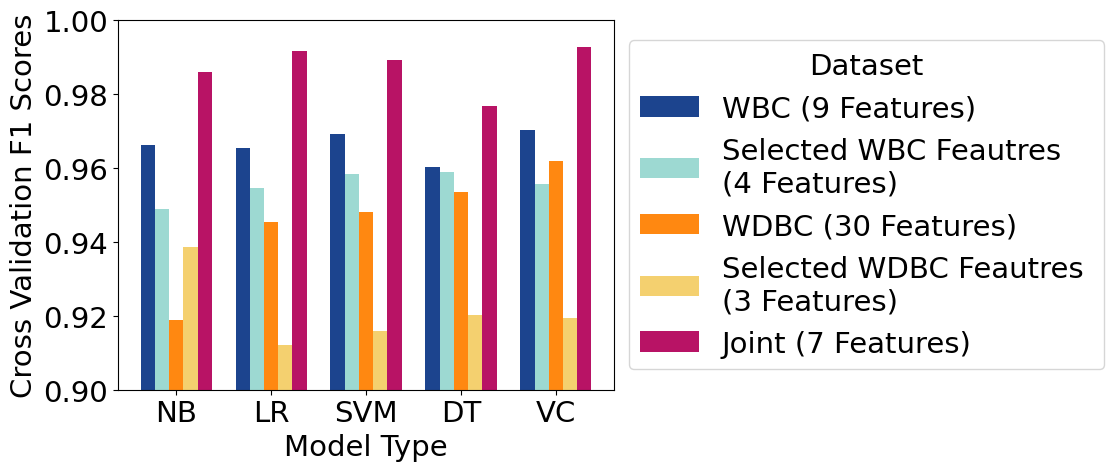

In [10]:
import matplotlib.pyplot as plt 
  
models = ['NB','LR','SVM', 'DT', 'VC']
wdbc = [np.mean(wdbcNB), np.mean(wdbcLog), np.mean(wdbcSVM),
        np.mean(wdbcDT), np.mean(wdbcVote)]
r_wdbc = [np.mean(r_wdbcNB), np.mean(r_wdbcLog), np.mean(r_wdbcSVM),
        np.mean(r_wdbcDT), np.mean(r_wdbcVote)]
wbc = [np.mean(wbcNB), np.mean(wbcLog), np.mean(wbcSVM),
        np.mean(wbcDT), np.mean(wbcVote)]
r_wbc = [np.mean(r_wbcNB), np.mean(r_wbcLog), np.mean(r_wbcSVM),
        np.mean(r_wbcDT), np.mean(r_wbcVote)]
joint = [np.mean(jointNB), np.mean(jointLog), np.mean(jointSVM),
        np.mean(jointDT), np.mean(jointVote)]

X_axis = np.arange(len(models))
  
print(np.mean(joint))
plt.rcParams.update({'font.size': 21})

plt.bar(X_axis - 0.3, wbc, 0.15, label = 'WBC (9 Features)', color='#1C448E')
plt.bar(X_axis - 0.15, r_wbc, 0.15, label = 'Selected WBC Feautres \n(4 Features)', color='#9DD9D2')
plt.bar(X_axis - 0, wdbc, 0.15, label = 'WDBC (30 Features)', color='#FF8811')
plt.bar(X_axis + 0.15, r_wdbc, 0.15, label = 'Selected WDBC Feautres \n(3 Features)', color='#F4D06F')
plt.bar(X_axis + 0.3, joint, 0.15, label = 'Joint (7 Features)', color='#B81365')

plt.xticks(X_axis, models)
plt.xlabel("Model Type")
plt.ylabel("Cross Validation F1 Scores")
plt.ylim(0.90,1)
#plt.title("Comparing Performance (F1) of WBC, WDBC, and \nCombination of the Two after Balancing on \n10-Fold Cross Validation")
plt.legend(title='Dataset',loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

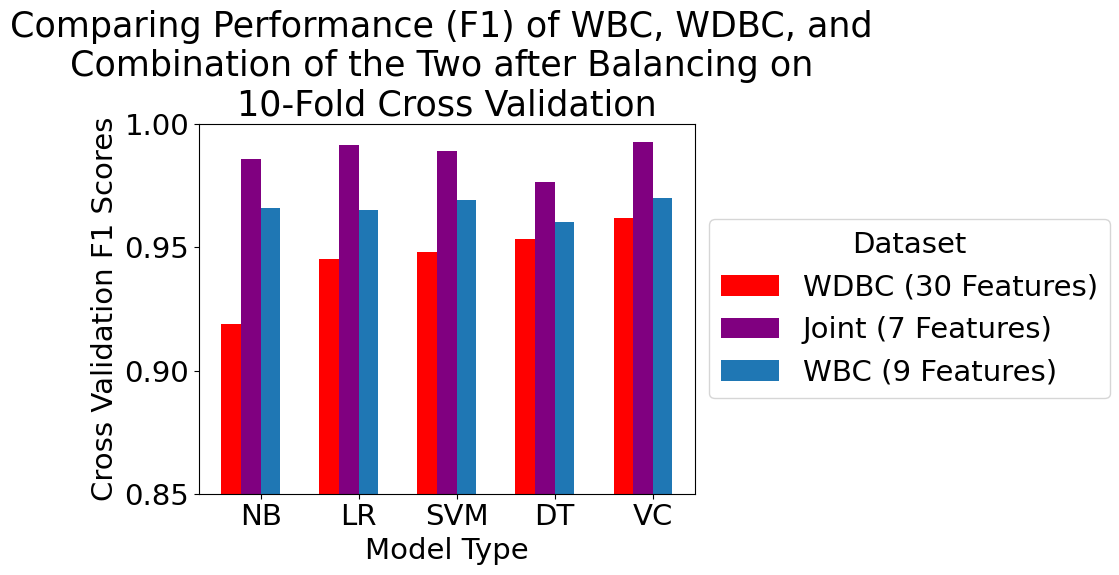

In [11]:
import matplotlib.pyplot as plt 
  
models = ['NB','LR','SVM', 'DT', 'VC']

wdbc = [np.mean(wdbcNB), np.mean(wdbcLog), np.mean(wdbcSVM),
        np.mean(wdbcDT), np.mean(wdbcVote)]
wbc = [np.mean(wbcNB), np.mean(wbcLog), np.mean(wbcSVM),
        np.mean(wbcDT), np.mean(wbcVote)]
joint = [np.mean(jointNB), np.mean(jointLog), np.mean(jointSVM),
        np.mean(jointDT), np.mean(jointVote)]

X_axis = np.arange(len(models))
  
plt.bar(X_axis - 0.3, wdbc, 0.2, label = 'WDBC (30 Features)', color='red')
plt.bar(X_axis - 0.1, joint, 0.2, label = 'Joint (7 Features)', color='purple')
plt.bar(X_axis + 0.1, wbc, 0.2, label = 'WBC (9 Features)', color='C0')
  
plt.xticks(X_axis, models)
plt.xlabel("Model Type")
plt.ylabel("Cross Validation F1 Scores")
plt.ylim(0.85,1)
plt.title("Comparing Performance (F1) of WBC, WDBC, and \nCombination of the Two after Balancing on \n10-Fold Cross Validation")
plt.legend(title='Dataset',loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [36]:
titles = ['Dataset', 'Model_Type']
for i in range(50):
    titles.append('Fold{}'.format(i))

resultsList = []

for i in ['WBC', 'WBC_Subset', 'WDBC', 'WDBC_Subset', 'Joined']:
    for j in ['Naive_Bayes','Logistic_Regression','Support_Vector_Machine','Decision_Tree','Voting_Classifier']:
        resultsList.append([i, j])


for i in wbcNB:
    resultsList[0].append(i)
for i in wbcLog:
    resultsList[1].append(i)
for i in wbcSVM:
    resultsList[2].append(i)
for i in wbcDT:
    resultsList[3].append(i)
for i in wbcVote:
    resultsList[4].append(i)
for i in r_wbcNB:
    resultsList[5].append(i)
for i in r_wbcLog:
    resultsList[6].append(i)
for i in r_wbcSVM:
    resultsList[7].append(i)
for i in r_wbcDT:
    resultsList[8].append(i)
for i in r_wbcVote:
    resultsList[9].append(i)
for i in wdbcNB:
    resultsList[10].append(i)
for i in wdbcLog:
    resultsList[11].append(i)
for i in wdbcSVM:
    resultsList[12].append(i)
for i in wdbcDT:
    resultsList[13].append(i)
for i in wdbcVote:
    resultsList[14].append(i)
for i in r_wdbcNB:
    resultsList[15].append(i)
for i in r_wdbcLog:
    resultsList[16].append(i)
for i in r_wdbcSVM:
    resultsList[17].append(i)
for i in r_wdbcDT:
    resultsList[18].append(i)
for i in r_wdbcVote:
    resultsList[19].append(i)
for i in jointNB:
    resultsList[20].append(i)
for i in jointLog:
    resultsList[21].append(i)
for i in jointSVM:
    resultsList[22].append(i)
for i in jointDT:
    resultsList[23].append(i)
for i in jointVote:
    resultsList[24].append(i)


for i in resultsList:
    print(i)

resultsDF = pd.DataFrame(resultsList, columns=titles)
print(resultsDF)
resultsDF.to_excel('../../../RAW_DATA/Joining_Data.xlsx')

['WBC', 'Naive_Bayes', 0.761904761904762, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9473684210526316, 1.0, 0.9, 0.9411764705882353, 0.9473684210526316, 1.0, 0.8888888888888888, 0.9473684210526316, 0.9473684210526316, 0.9473684210526316, 0.9411764705882353, 0.9473684210526316, 1.0, 0.9473684210526316, 0.9411764705882353, 1.0, 1.0, 1.0, 0.9473684210526316, 1.0, 0.9473684210526316, 1.0, 0.9411764705882353, 1.0, 0.9473684210526316, 1.0, 1.0, 0.9411764705882353, 1.0, 1.0, 0.9473684210526316, 0.8571428571428571, 1.0, 1.0, 0.9333333333333333, 1.0, 1.0, 1.0, 1.0, 0.9473684210526316, 1.0, 1.0, 0.8888888888888888]
['WBC', 'Logistic_Regression', 0.9, 0.9411764705882353, 1.0, 1.0, 0.9411764705882353, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9411764705882353, 0.9473684210526316, 1.0, 0.9473684210526316, 0.9473684210526316, 0.9473684210526316, 0.9473684210526316, 0.9411764705882353, 0.9473684210526316, 1.0, 0.9473684210526316, 0.9411764705882353, 1.0, 1.0, 1.0, 0.9473684210526316, 1.0, 0.9473684210526316, 1.0, 0.8750000000

['Dataset', 'Model_Type', 'Fold0', 'Fold1', 'Fold2', 'Fold3', 'Fold4', 'Fold5', 'Fold6', 'Fold7', 'Fold8', 'Fold9', 'Fold10', 'Fold11', 'Fold12', 'Fold13', 'Fold14', 'Fold15', 'Fold16', 'Fold17', 'Fold18', 'Fold19', 'Fold20', 'Fold21', 'Fold22', 'Fold23', 'Fold24', 'Fold25', 'Fold26', 'Fold27', 'Fold28', 'Fold29', 'Fold30', 'Fold31', 'Fold32', 'Fold33', 'Fold34', 'Fold35', 'Fold36', 'Fold37', 'Fold38', 'Fold39', 'Fold40', 'Fold41', 'Fold42', 'Fold43', 'Fold44', 'Fold45', 'Fold46', 'Fold47', 'Fold48', 'Fold49']
